# DEcorators

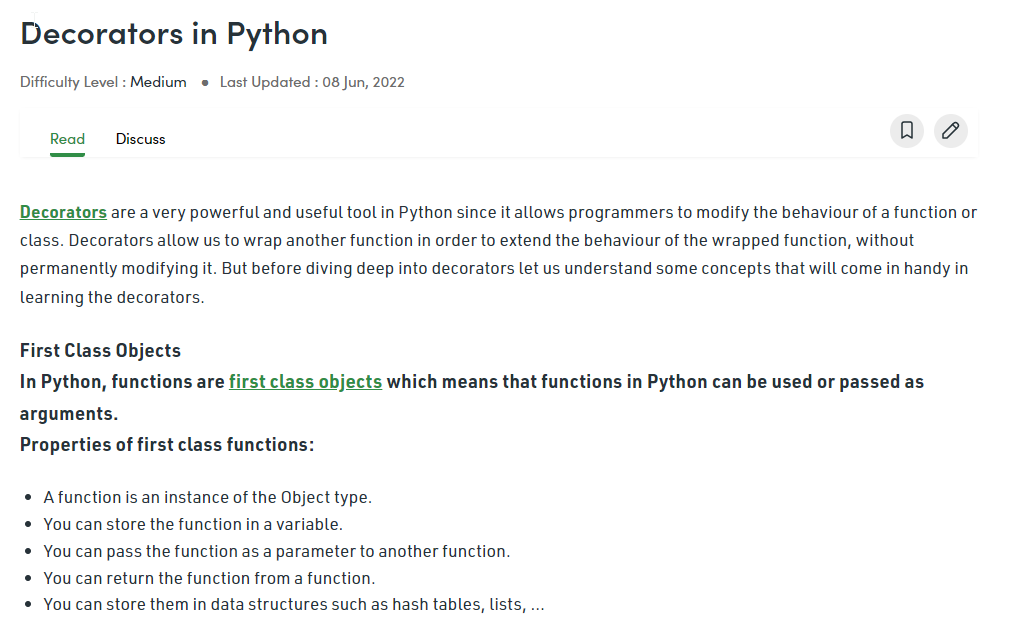

https://www.geeksforgeeks.org/decorators-in-python/

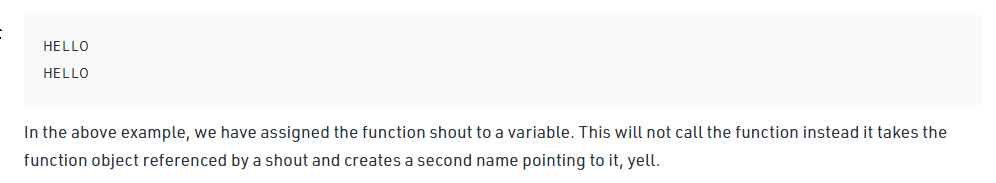

In [1]:
# Python program to illustrate functions
# can be treated as objects
def shout(text):
	return text.upper()

print(shout('Hello'))

yell = shout

print(yell('Hello'))


HELLO
HELLO


In the above example, we have assigned the function shout to a variable. This will not call the function instead it takes the function object referenced by a shout and creates a second name pointing to it, yell.

In [2]:
# Python program to illustrate functions
# can be passed as arguments to other functions
def shout(text):
	return text.upper()

def whisper(text):
	return text.lower()

def greet(func):
	# storing the function in a variable
	greeting = func("""Hi, I am created by a function passed as an argument.""")
	print (greeting)

greet(shout)
greet(whisper)


HI, I AM CREATED BY A FUNCTION PASSED AS AN ARGUMENT.
hi, i am created by a function passed as an argument.


In the above example, the greet function takes another function as a parameter (shout and whisper in this case). The function passed as an argument is then called inside the function greet.

In [3]:
# Python program to illustrate functions
# Functions can return another function

def create_adder(x):
	def adder(y):
		return x+y

	return adder

add_15 = create_adder(15)

print(add_15(10))


25


In the above example, we have created a function inside of another function and then have returned the function created inside.
The above three examples depict the important concepts that are needed to understand decorators. After going through them let us now dive deep into decorators.

### func is an argument given to the function identity_decorator().

### The expression func() means "call the function assigned to the variable func."

### The decorator is taking another function as an argument, and returning a new function (defined as wrapper) which executes the given function func when it is run.

## Decorators
As stated above the decorators are used to modify the behaviour of function or class. In Decorators, functions are taken as the argument into another function and then called inside the wrapper function.

@gfg_decorator
def hello_decorator():
    print("Gfg")

'''Above code is equivalent to -

def hello_decorator():
    print("Gfg")
    
hello_decorator = gfg_decorator(hello_decorator)'''

In the above code, gfg_decorator is a callable function, that will add some code on the top of some another callable function, hello_decorator function and return the wrapper function.

In [32]:
# defining a decorator
def hello_decorator(func):

	# inner1 is a Wrapper function in which the argument is called

	# inner function can access the outer local  functions like in this case "func"
	def inner1():
		print("Hello, this is before function execution")

		# calling the actual function now  inside the wrapper function.
		func()

		print("This is after function execution")
		
	return inner1


# defining a function, to be called inside wrapper
def function_to_be_used():
	print("This is inside the function !!")


# passing 'function_to_be_used' inside the decorator to control its behaviour

function_to_be_used = hello_decorator(function_to_be_used)


# calling the function
function_to_be_used()


Hello, this is before function execution
This is inside the function !!
This is after function execution


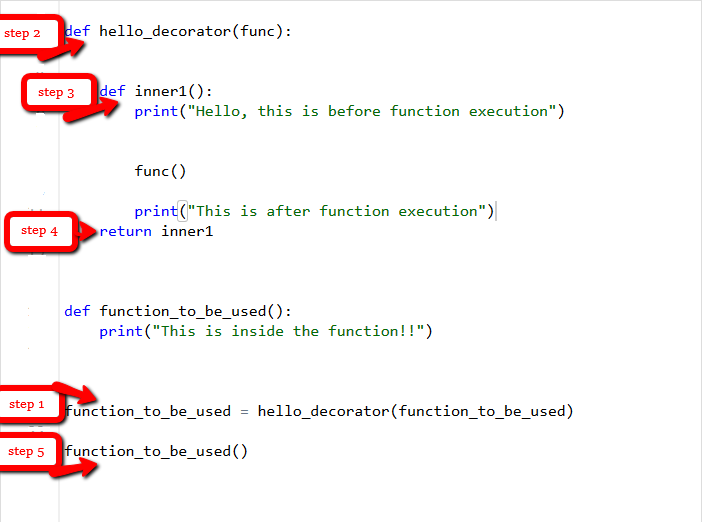

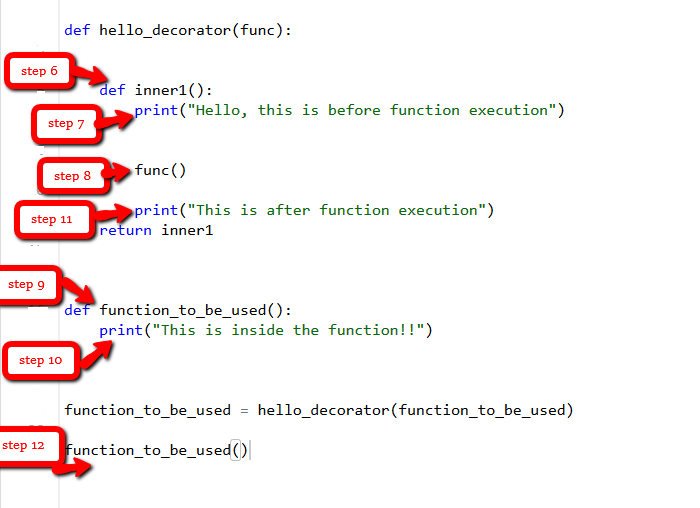

In [33]:
# importing libraries
import time
import math

# decorator to calculate duration taken by any function.
def calculate_time(func):
	
	# added arguments inside the inner1, if function takes any arguments, can be added like this.
	def inner1(*args, **kwargs):

		# storing time before function execution
		begin = time.time()
		
		func(*args, **kwargs)

		# storing time after function execution
		end = time.time()
		print("Total time taken in : ", func.__name__, end - begin)

	return inner1



# this can be added to any function present, in this case to calculate a factorial
@calculate_time
def factorial(num):

	# sleep 2 seconds because it takes very less time  so that you can see the actual difference
	time.sleep(2)
	print(math.factorial(num))

# calling the function.
factorial(10)


3628800
Total time taken in :  factorial 2.0146865844726562


## What if a function returns something or an argument is passed to the function?
In all the above examples the functions didn’t return anything so there wasn’t an issue, but one may need the returned value.

In [ ]:
def hello_decorator(func):
	def inner1(*args, **kwargs):
		
		print("before Execution")
		
		# getting the returned value
		returned_value = func(*args, **kwargs)
		print("after Execution")
		
		# returning the value to the original frame
		return returned_value
		
	return inner1


# adding decorator to the function
@hello_decorator
def sum_two_numbers(a, b):
	print("Inside the function")
	return a + b

a, b = 1, 2

# getting the value through return of the function
print("Sum =", sum_two_numbers(a, b))


* In the above example, you may notice a keen difference in the parameters of the inner function. 
* The inner function takes the argument as *args and **kwargs which means that a tuple of positional arguments or a dictionary of keyword arguments can be passed of any length. 
* This makes it a general decorator that can decorate a function having any number of arguments.

## Chaining Decorators
In simpler terms chaining decorators means decorating a function with multiple decorators.

In [34]:
# code for testing decorator chaining
def decor1(func):
	def inner():
		x = func()
		return x * x
	return inner

def decor(func):
	def inner():
		x = func()
		return 2 * x
	return inner

@decor1
@decor
def num():
	return 10

print(num())


400


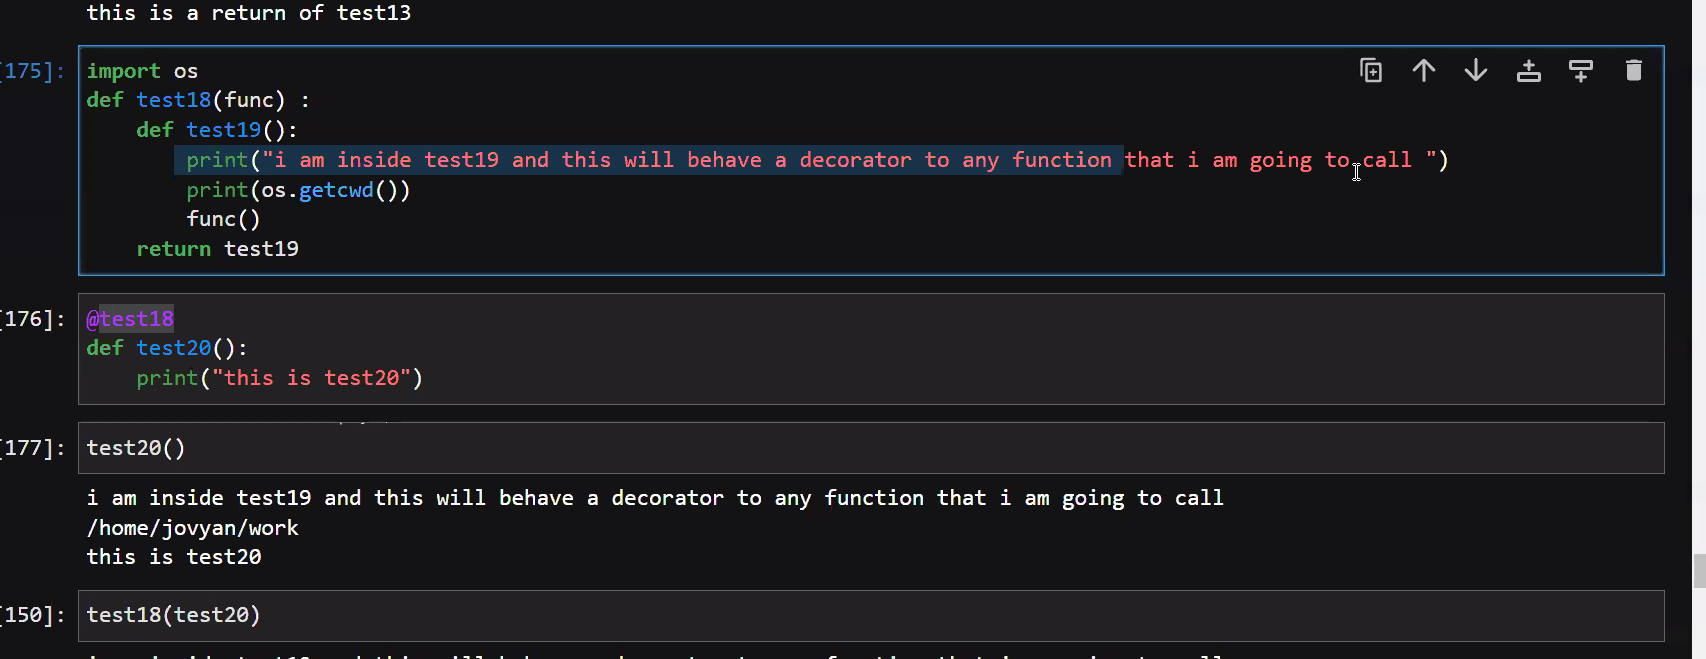

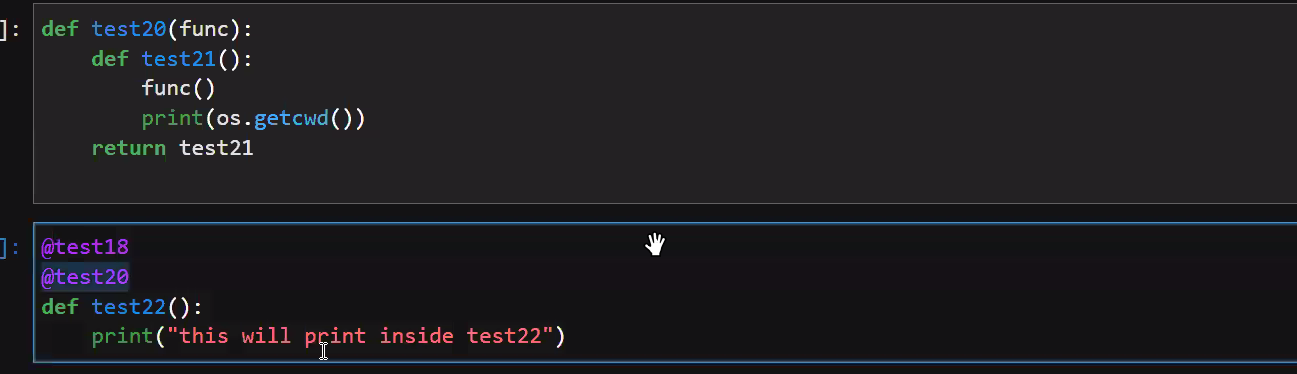

In [4]:
import os
def test18(func):
    def test19():
        print("something1")
        print(os.getcwd())
        func()
    return test19

In [9]:
def test20(func):
    def test21():
        func()
        print(os.getcwd())
    return test21

In [10]:
@test18
@test20
def test22():
    print("this will print inside of test22")

In [11]:
test22()

something1
C:\Users\manum\OneDrive\0000.DS\99. ML and Python\00.iNeuron_FSDS2.0\00.Python\01.FSDS_Sep22
this will print inside of test22
C:\Users\manum\OneDrive\0000.DS\99. ML and Python\00.iNeuron_FSDS2.0\00.Python\01.FSDS_Sep22


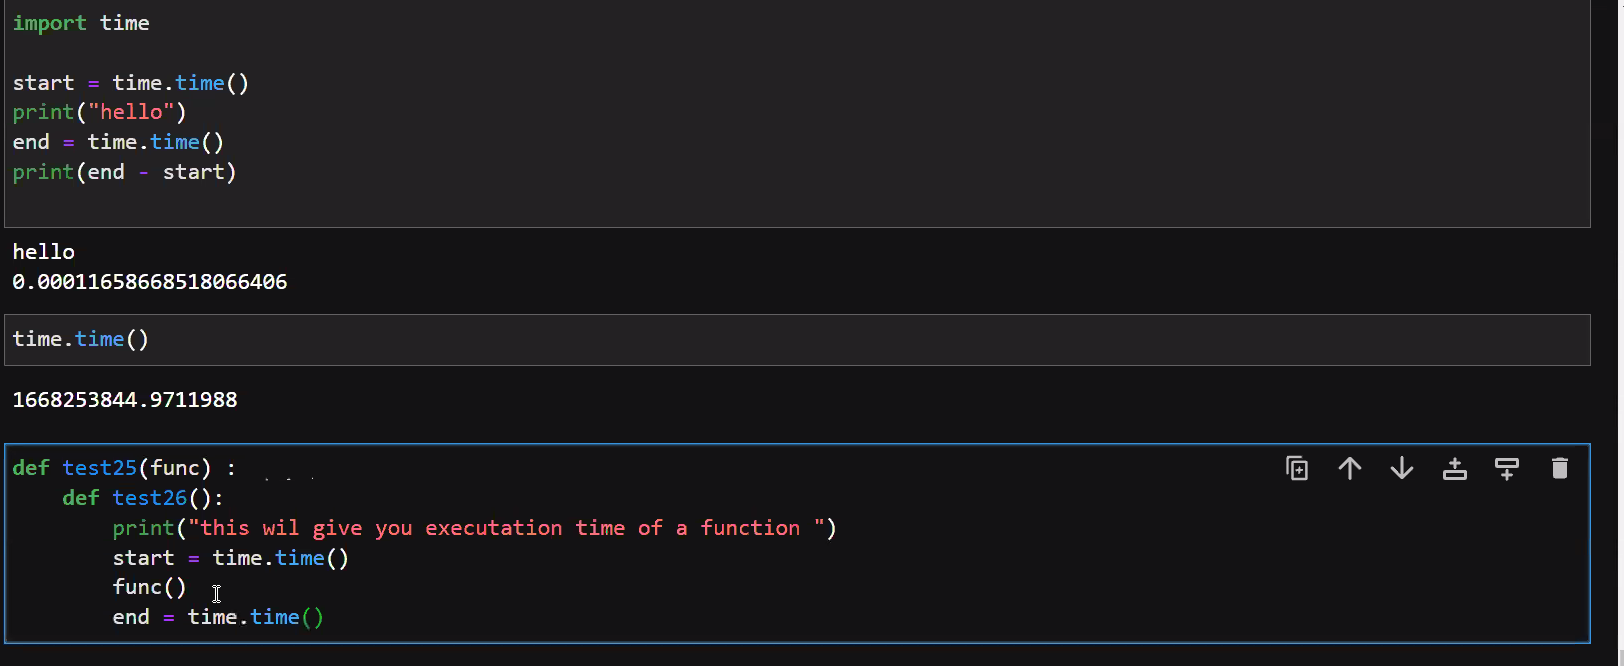

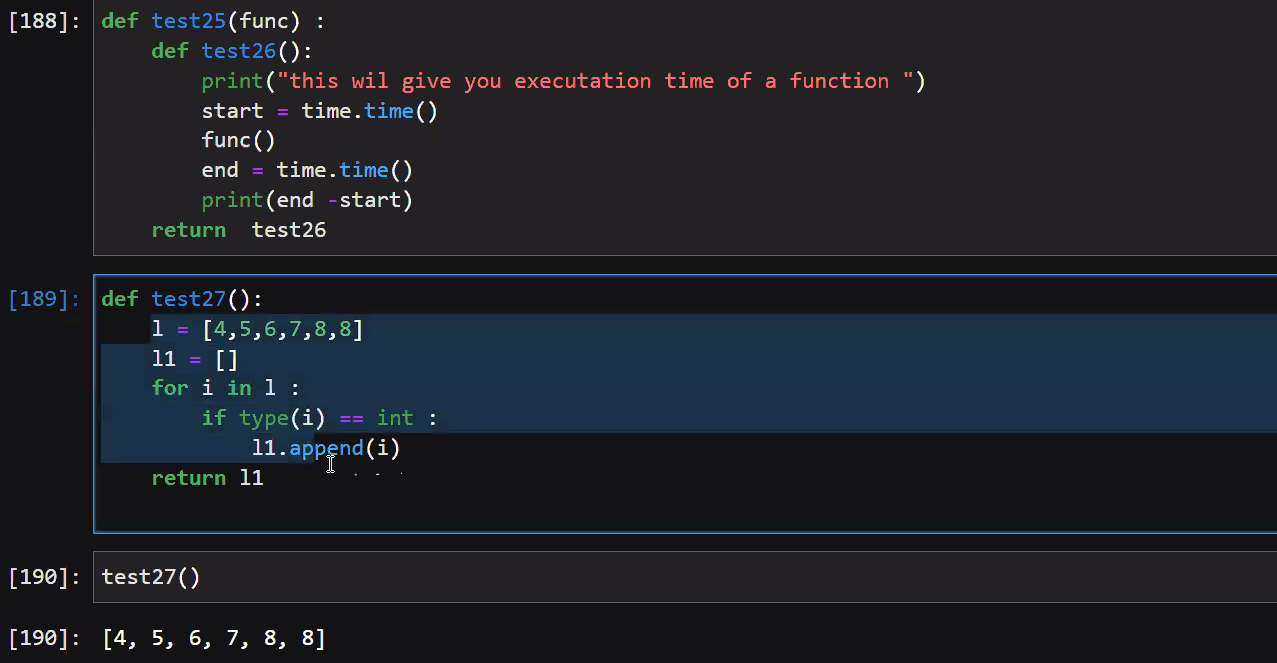

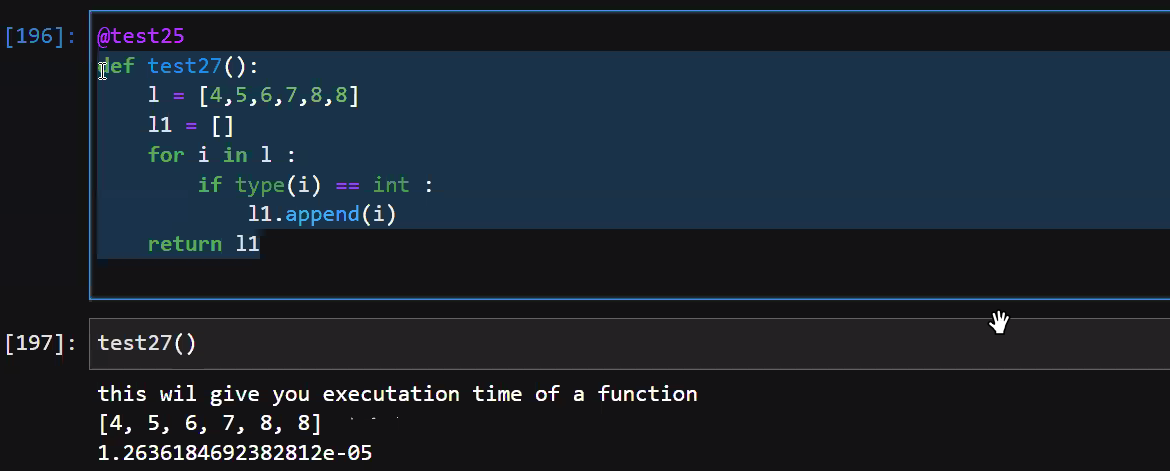

In [27]:
import time
def test25(func):
    def test26():
        print("this will give execution time")
        start = time.time()
        func()
        end = time.time()
        print fact(end-start)
    return test26

In [30]:
@test25
def test27():
    lst = [4,4,5,6,7,4,32,6,7,4,5,6,7,4,32,6,7,4,5,6,7,4,32,6,7,4,5,6,7,4,32,6,7]
    lst01=list()
    for i in lst:
        if type(i) == int:
            lst01.append(i)
    return lst01 

In [31]:
test27()

this will give execution time
0.0
